In [41]:
from note_tools.display_tool import tikz_to_image



This is pdfTeX, Version 3.141592653-2.6-1.40.27 (TeX Live 2025) (preloaded format=pdflatex)
entering extended mode


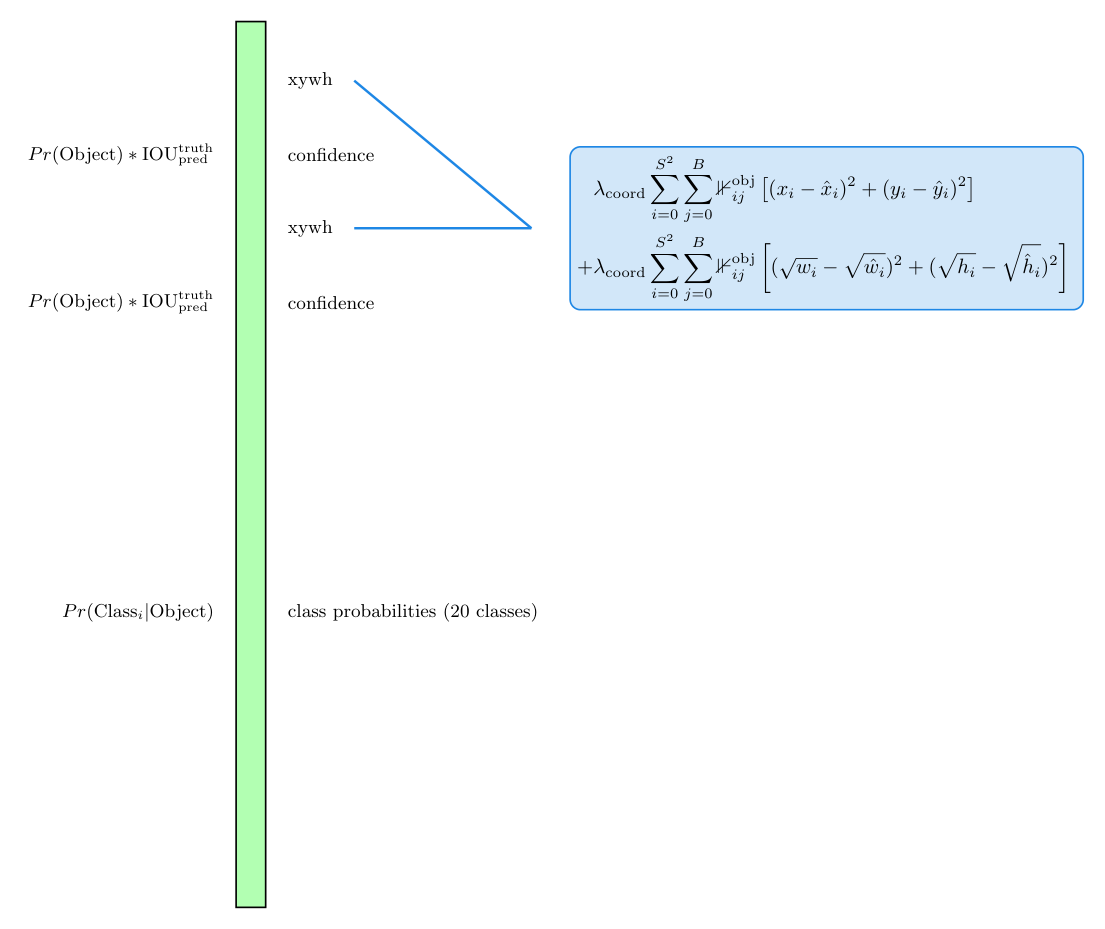

In [98]:
tikz_code = r"""
\documentclass[tikz,border=10pt]{standalone}
\usepackage{tikz}
\usepackage{amsmath,amssymb} % 补充amssymb包，用于\mathbb{1}指示函数
% \usepackage{ctex} % 支持中文显示（解决中文Unicode报错）
\usetikzlibrary{shapes.geometric, arrows, positioning, calc, decorations.pathreplacing}

% 定义颜色（学术风配色，可自定义）
\definecolor{blue1}{RGB}{30,136,229}    % 主蓝
\definecolor{red1}{RGB}{233,30,99}      % 红（置信度损失）
\definecolor{green1}{RGB}{67,160,71}    % 绿（类别损失）
\definecolor{orange1}{RGB}{251,140,0}   % 橙（坐标损失）
\definecolor{gray1}{RGB}{158,158,158}   % 灰（辅助模块）

% 定义箭头样式（修复核心语法错误）
\tikzset{
    arrow/.style={thick, ->, >=stealth},
    % block/.style={rectangle, rounded corners=5pt, thick, draw, minimum height=1.2cm, minimum width=2.5cm, align=center},
    arrow_blue1/.style={line width=1.2pt, ->, >=Stealth[length=6pt, width=4pt], color=blue1},
}

\begin{document}
\begin{tikzpicture}[
    % 定义绿色矩形样式：浅绿色填充、黑色边框
    green_rect/.style={fill=green!30, draw=black, line width=0.8pt},
    % 定义标注文本样式：左对齐、字体适中
    label_text/.style={anchor=west, font=\small},
    % 定义弧线括号样式：黑色实线、线宽适中
    arc_bracket/.style={draw=black, line width=0.6pt, decoration={brace, raise=5pt}, decorate}
    % 蓝色模块
    arrow_blue/.style={line width=1.2pt, ->, >=Stealth, color=blue1},
    loss_block_blue/.style={rectangle, rounded corners=5pt, thick, draw=blue1, fill=blue1!20, minimum height=2cm, minimum width=4cm, align=center}, % 蓝色损失矩形
    % loss_block/.style={rectangle, rounded corners=5pt, thick, draw, fill=#1!20, minimum height=1.5cm, minimum width=3cm, align=center},
    formula/.style={text width=5cm, align=center, font=\small} % 加宽文本宽度，避免公式溢出
]

% 定义单位长度为0.5
\def\unit{0.5}

% 第一步：画第一个绿色矩形（左下角(0,0)，右上角(1,30)）
\draw[green_rect] (0,0) rectangle (\unit,30*\unit);

% -------------------- 第二步：在矩形右侧标注内容（从上往下依次说明）
% 核心逻辑：矩形高度30*unit，从上到下坐标从30*unit→0，每个标注文本垂直居中对齐对应区域
% 1. 第1-4位：xywh（对应y轴30*\unit ~ 26*\unit，共4个单位高度）
% 弧线括号：从(\unit, 30*\unit)到(\unit, 26*\unit)，向右凸起
\draw[arc_bracket] (\unit, 30*\unit) -- (\unit, 26*\unit);
% 标注文本：在括号右侧15pt处，垂直居中对齐该区域
\node[label_text] at ($(\unit, 28*\unit) + (0.5*\unit, 0)$) {xywh};

% 2. 第5位：置信度（对应y轴26*\unit ~ 25*\unit，1个单位高度）
\draw[arc_bracket] (\unit, 26*\unit) -- (\unit, 25*\unit);
\node[label_text] at ($(\unit, 25.5*\unit) + (0.5*\unit, 0)$) {confidence};

% 3. 第6-9位：xywh（对应y轴25*\unit ~ 21*\unit，共4个单位高度）
\draw[arc_bracket] (\unit, 25*\unit) -- (\unit, 21*\unit);
\node[label_text] at ($(\unit, 23*\unit) + (0.5*\unit, 0)$) {xywh};
\draw[arc_bracket] (\unit, 21*\unit) -- (\unit, 20*\unit);
\node[label_text] at ($(\unit, 20.5*\unit) + (0.5*\unit, 0)$) {confidence};

% 4. 第10-30位：类别概率（对应y轴20*\unit ~ 0，共20个单位高度）
\draw[arc_bracket] (\unit, 20*\unit) -- (\unit, 0);
\node[label_text] at ($(\unit, 10*\unit) + (0.5*\unit, 0)$) {class probabilities (20 classes)};

% 5. 左侧具体公式说明
% \draw[arc_bracket] (0, 25*\unit) -- (0, 26*\unit);
\node[label_text, anchor=east] at ($ (0, 25.5*\unit) + (-0.5*\unit, 0) $) { $Pr(\text{Object}) * \text{IOU}_{\text{pred}}^{\text{truth}}$ };
\node[label_text, anchor=east] at ($ (0, 20.5*\unit) + (-0.5*\unit, 0) $) { $Pr(\text{Object}) * \text{IOU}_{\text{pred}}^{\text{truth}}$ };
\node[label_text, anchor=east] at ($ (0, 10*\unit) + (-0.5*\unit, 0) $) { $Pr(\text{Class}_i | \text{Object})$ };

% -------------------- 第三步：添加右侧蓝色矩形（坐标损失函数）
% 1. 蓝色损失矩形位置：在绿色矩形右侧6个单位处，垂直居中对齐两个xywh区域（y=23*\unit）
\def\blockx{20*\unit}
\def\blocky{23*\unit}
\node[loss_block_blue] (coord_loss) at ($(\blockx, \blocky)$) {
    $$\begin{aligned}
    \lambda_{\text{coord}} \sum_{i=0}^{S^2} \sum_{j=0}^{B} \mathbb{1}_{ij}^{\text{obj}} & \left[ (x_i - \hat{x}_i)^2 + (y_i - \hat{y}_i)^2 \right] \\
    + \lambda_{\text{coord}} \sum_{i=0}^{S^2} \sum_{j=0}^{B} \mathbb{1}_{ij}^{\text{obj}} & \left[ (\sqrt{w_i} - \sqrt{\hat{w}_i})^2 + (\sqrt{h_i} - \sqrt{\hat{h}_i})^2 \right]
    \end{aligned}$$
 };
\draw[arrow_blue1] ($(\unit + 3*\unit, 28*\unit)$) -- ($(\blockx - 10 * \unit, \blocky)$); 
\draw[arrow_blue1] ($(\unit + 3*\unit, 23*\unit)$) -- ($(\blockx - 10 * \unit, \blocky)$);



\end{tikzpicture}
\end{document}
"""
draw = tikz_to_image(tikz_code, full_snippet=True, replace_sharp=False, dpi=150)